In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
nba = pd.read_csv("all_seasons.csv")
nba = nba.loc[:,"player_name":"season"]
nba["season"] = pd.to_datetime(nba["season"].str[:4])

In [16]:
nba

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-01-01
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-01-01
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-01-01
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-01-01
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,Maxi Kleber,DAL,28.0,208.28,108.862080,None,Germany,Undrafted,Undrafted,Undrafted,...,9.1,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-01-01
11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,35,...,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-01-01
11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,11,...,6.1,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-01-01
11143,Norvel Pelle,PHI,27.0,208.28,104.779752,None,USA,Undrafted,Undrafted,Undrafted,...,2.1,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-01-01


In [23]:
nba["position"] = ""
nba["position"][nba["player_height"] >= 209] = "Center"
nba["position"][nba["player_height"] <= 199] = "Guard"
nba["position"][(nba.player_height > 199)&(nba.player_height < 209 )] = "Forward"
nba

<ipython-input-23-d51621dc8b65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba["position"][nba["player_height"] >= 209] = "Center"
<ipython-input-23-d51621dc8b65>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba["position"][nba["player_height"] <= 199] = "Guard"
<ipython-input-23-d51621dc8b65>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba["position"][(nba.player_height > 199)&(nba.player_height < 209 )] = "Forward"


,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,position
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-01-01,Guard
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-01-01,Center
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-01-01,Forward
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-01-01,Forward
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-01-01,Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,Maxi Kleber,DAL,28.0,208.28,108.862080,None,Germany,Undrafted,Undrafted,Undrafted,...,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-01-01,Forward
11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,35,...,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-01-01,Guard
11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,11,...,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-01-01,Center
11143,Norvel Pelle,PHI,27.0,208.28,104.779752,None,USA,Undrafted,Undrafted,Undrafted,...,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-01-01,Forward


In [34]:
center = nba["position"] == "Center"
center_usg = nba[center]
center_usg2 = center_usg.groupby("season").mean()["usg_pct"]

season
1996-01-01    0.182988
1997-01-01    0.183500
1998-01-01    0.191542
1999-01-01    0.181440
2000-01-01    0.178370
2001-01-01    0.178506
2002-01-01    0.174636
2003-01-01    0.177670
2004-01-01    0.176822
2005-01-01    0.176494
2006-01-01    0.179087
2007-01-01    0.173965
2008-01-01    0.181107
2009-01-01    0.180610
2010-01-01    0.168420
2011-01-01    0.173483
2012-01-01    0.183413
2013-01-01    0.180369
2014-01-01    0.189735
2015-01-01    0.189720
2016-01-01    0.186886
2017-01-01    0.184675
2018-01-01    0.188317
2019-01-01    0.187596
Name: usg_pct, dtype: float64

Text(0, 0.5, 'USG%')

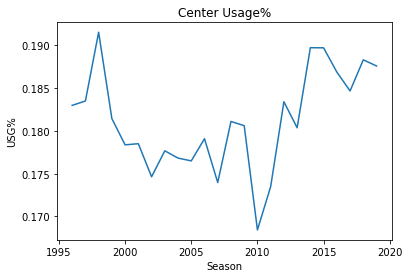

In [39]:
year_list = []
for i in range(1996,2020,1):
    year_list.append(i)
sns.lineplot(x=year_list,y=center_usg2,style=)
plt.title("Center Usage%")
plt.xlabel("Season")
plt.ylabel("USG%")

In [41]:
guard = nba["position"] == "Guard"
guard_reb = nba[guard]
guard_reb_o = guard_reb.groupby("season").mean()["oreb_pct"]
guard_reb_d = guard_reb.groupby("season").mean()["dreb_pct"]

Text(0, 0.5, 'DEF REB%')

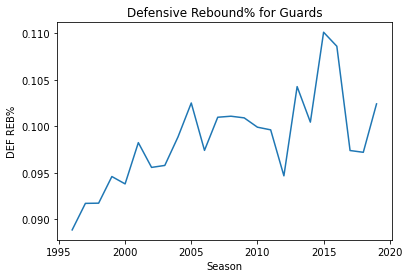

In [46]:
sns.lineplot(x=year_list,y=guard_reb_d)
plt.title("Defensive Rebound% for Guards")
plt.xlabel("Season")
plt.ylabel("DEF REB%")

Text(0, 0.5, 'OFF REB%')

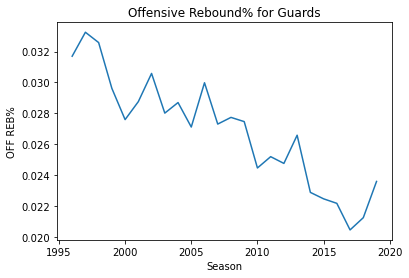

In [47]:
sns.lineplot(x=year_list,y=guard_reb_o)
plt.title("Offensive Rebound% for Guards")
plt.xlabel("Season")
plt.ylabel("OFF REB%")

In [50]:
nba_2019_20 = nba["season"].dt.year == 2019
current_nba = nba[nba_2019_20]
current_nba

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,position
10631,Georges Niang,UTA,26.0,200.66,104.326160,Iowa State,USA,2016,2,50,...,1.9,0.6,-2.1,0.015,0.119,0.160,0.615,0.067,2019-01-01,Forward
10632,George Hill,MIL,33.0,190.50,85.275296,None,USA,2008,1,26,...,3.0,2.9,11.7,0.039,0.086,0.155,0.675,0.192,2019-01-01,Guard
10633,Gary Trent Jr.,POR,21.0,195.58,94.800728,None,USA,Undrafted,Undrafted,Undrafted,...,1.7,0.9,-4.1,0.017,0.058,0.152,0.563,0.065,2019-01-01,Guard
10634,Gary Payton II,WAS,27.0,190.50,88.450440,Oregon State,USA,Undrafted,Undrafted,Undrafted,...,2.9,1.7,-15.0,0.054,0.122,0.132,0.473,0.159,2019-01-01,Guard
10635,Gary Harris,DEN,25.0,193.04,95.254320,Michigan State,USA,2014,1,19,...,2.9,2.1,3.9,0.015,0.078,0.151,0.513,0.091,2019-01-01,Guard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,Maxi Kleber,DAL,28.0,208.28,108.862080,None,Germany,Undrafted,Undrafted,Undrafted,...,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-01-01,Forward
11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,35,...,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-01-01,Guard
11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,11,...,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-01-01,Center
11143,Norvel Pelle,PHI,27.0,208.28,104.779752,None,USA,Undrafted,Undrafted,Undrafted,...,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-01-01,Forward


Text(17.197291666666665, 0.5, 'Count')

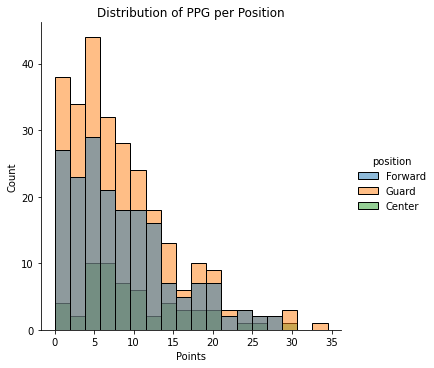

In [52]:
sns.displot(x="pts",data=current_nba,hue="position")
plt.title("Distribution of PPG per Position")
plt.xlabel("Points")
plt.ylabel("Count")

Text(9.550000000000004, 0.5, 'Points')

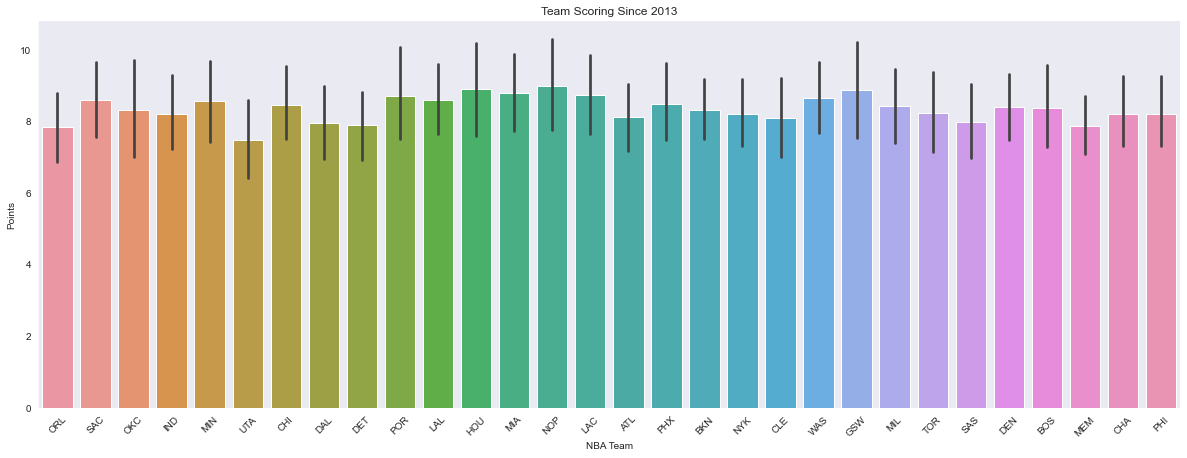

In [133]:
recent_decade = nba["season"].dt.year >= 2013
decade_nba = nba[recent_decade]
sns.color_palette("crest", as_cmap=True)
g=sns.catplot(x = "team_abbreviation", y = "pts", kind = "bar", data = decade_nba)
g.fig.set_size_inches(18,6)
plt.xticks(rotation=45)
plt.title("Team Scoring Since 2013")
plt.xlabel("NBA Team")
plt.ylabel("Points")

Text(12.690694444444453, 0.5, 'Assists')

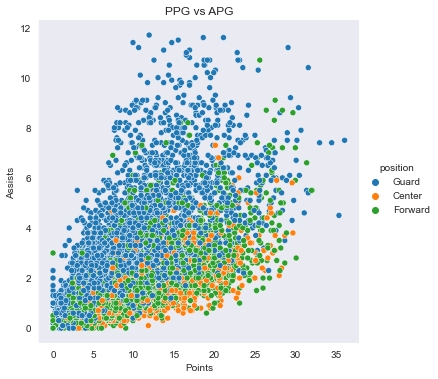

In [131]:
sns.relplot(x="pts",y="ast",data=nba,hue="position")
plt.title("PPG vs APG")
plt.xlabel("Points")
plt.ylabel("Assists")

Text(12.690694444444453, 0.5, 'Assists')

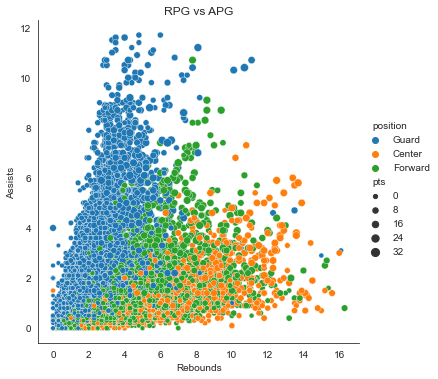

In [150]:
sns.set_style("ticks")
sns.set_style("white")
sns.relplot(x="reb",y="ast",data=nba,hue="position",size="pts")
plt.title("RPG vs APG")
plt.xlabel("Rebounds")
plt.ylabel("Assists")